In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_entropy_from_data(data):
    return np.array(data["inactive"]["entropy"]["shannonEntropy"])

def get_data(file):
    return json.load(open(file))

In [4]:
data_popsy = get_data("/home/tom/Programming/SCONE/InputFiles/output.json")
popsy_flux_map = np.array(data_popsy["active"]["fluxMap"]["Res"])

In [5]:
large_flux_map = np.array(get_data("/home/tom/Programming/SCONE/output_large.json")["active"]["fluxMap"]["Res"])
mid_flux_map = np.array(get_data("/home/tom/Programming/SCONE/output_mid.json")["active"]["fluxMap"]["Res"])
small_flux_map = np.array(get_data("/home/tom/Programming/SCONE/output_small.json")["active"]["fluxMap"]["Res"])
tiny_flux_map = np.array(get_data("/home/tom/Programming/SCONE/output_tiny.json")["active"]["fluxMap"]["Res"])

23.885
84.1075


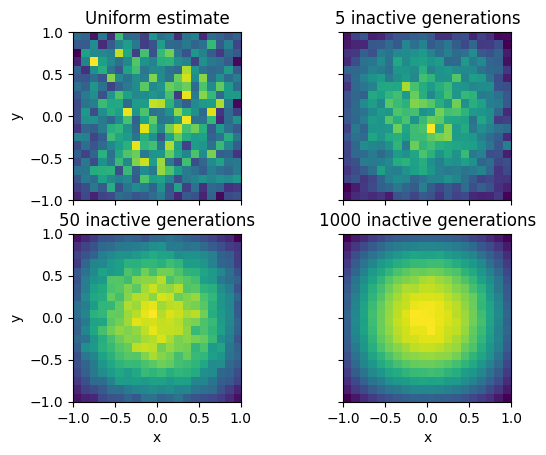

In [6]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)

img = ax[0][0].imshow(tiny_flux_map[10, :, :, 0, 0], extent=[-1, 1, -1, 1])
ax[0][0].set_ylabel("y")
ax[0][0].set_title(f"Uniform estimate")

img = ax[0][1].imshow(small_flux_map[10, :, :, 0, 0], extent=[-1, 1, -1, 1])
ax[0][1].set_title(f"5 inactive generations")

img = ax[1][0].imshow(mid_flux_map[10, :, :, 0, 0], extent=[-1, 1, -1, 1])
ax[1][0].set_xlabel("x")
ax[1][0].set_ylabel("y")
ax[1][0].set_title(f"50 inactive generations")

img = ax[1][1].imshow(large_flux_map[10, :, :, 0, 0], extent=[-1, 1, -1, 1])
ax[1][1].set_xlabel("x")
ax[1][1].set_title(f"1000 inactive generations")

print(np.min(large_flux_map[10, :, :, 0, 0]))
print(np.max(large_flux_map[10, :, :, 0, 0]))

In [7]:
# total_flux = np.sum(popsy_flux_map[10, :, :, :, 0, 0], axis=2)
# total_flux[total_flux == 0] = np.nan

# fig, (ax1, ax2) = plt.subplots(1, 2)

# img = ax1.imshow(total_flux, extent=[-100, 100, -100, 100])
# fig.colorbar(img, label="Relative Flux")
# ax1.set_xlabel("x")
# ax1.set_ylabel("y")

# average_energy = np.zeros(total_flux.shape)
# for index, (energy_lower, energy_upper) in enumerate(zip(*data_popsy["active"]["fluxMap"]["EnergyBounds"])):
#     average_bin_energy = (energy_upper + energy_lower) / 2
#     average_energy += popsy_flux_map[10, :, :, index, 0, 0] * average_bin_energy

# average_energy[average_energy == 0] = np.nan

# img = ax2.imshow(average_energy, extent=[-100, 100, -100, 100])
# fig.colorbar(img, label="Relative Flux")
# ax2.set_xlabel("x")
# ax2.set_ylabel("y")

In [8]:
# energy = 7
# plt.imshow(flux_map[10, :, :, energy, 0, 0], extent=[-100, 100, -100, 100])
# plt.colorbar(label="Relative Flux")
# plt.xlabel("x")
# plt.ylabel("y")

[array([99.31880056,  0.26853311]), array([99.44116579,  0.26926266]), array([99.37860166,  0.2687876 ])]


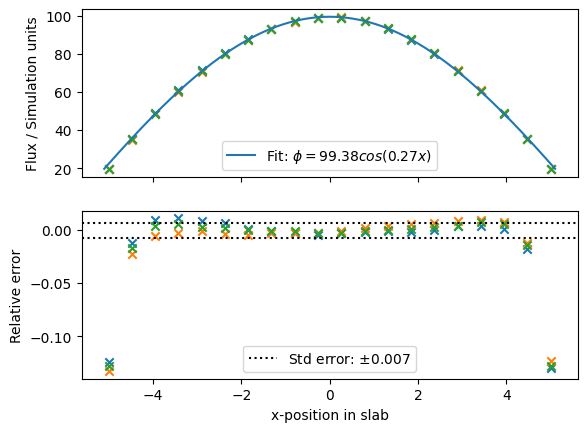

In [282]:
from scipy.optimize import curve_fit

def cos_fn(x, a, b):
    return a * np.cos(b * x)

flux_arrays = []
cos_constants = []
for i in ['a', 'b', 'c']:
    data = get_data(f"/home/tom/Programming/SCONE/flux_measurements_mod/{i}.json")
    array = np.array(data["active"]["fluxMap"]["Res"])[:, :, :, 0, 0]
    array = np.mean(array, axis=0)
    array = np.mean(array, axis=1)


    popt, pcov = curve_fit(cos_fn, np.linspace(-5, 5, len(array))[1:-1], array[1:-1], bounds=[(0, 0), (120, 0.5)])
    cos_constants.append(popt)

    flux_arrays.append(array)


# Fit cos_fn to flux_res
print(cos_constants)
average_constants = np.mean(np.abs(cos_constants), axis=0)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for flux in flux_arrays:
    ax1.scatter(np.linspace(-5, 5, len(flux)), flux, marker='x')


ax1.plot(np.linspace(-5.1, 5.1, 1000), average_constants[0]*np.cos(np.linspace(-5.1, 5.1, 1000)*average_constants[1]), label=f"Fit: $\\phi = {average_constants[0]:.2f}cos({average_constants[1]:.2f}x)$")
ax1.set_ylabel(r"Flux / Simulation units")
ax1.legend()

# Plot an error histogram
all_errors = []
for flux in flux_arrays:
    error = flux - average_constants[0]*np.cos(np.linspace(-5, 5, len(flux))*average_constants[1])
    ax2.scatter(np.linspace(-5, 5, len(flux)), error/ (average_constants[0]*np.cos(np.linspace(-5, 5, len(flux))*average_constants[1])), marker='x')
    all_errors.extend((error/(average_constants[0]*np.cos(np.linspace(-5, 5, len(flux))*average_constants[1])))[1:-1])

ax2.axhline(np.mean(all_errors)+np.std(all_errors), color='black', linestyle=':', label=f"Std error: $\\pm{np.std(all_errors):.3f}$")
ax2.axhline(np.mean(all_errors)-np.std(all_errors), color='black', linestyle=':')

ax2.set_ylabel("Relative error")
ax2.set_xlabel("x-position in slab")
ax2.legend(loc="lower center")

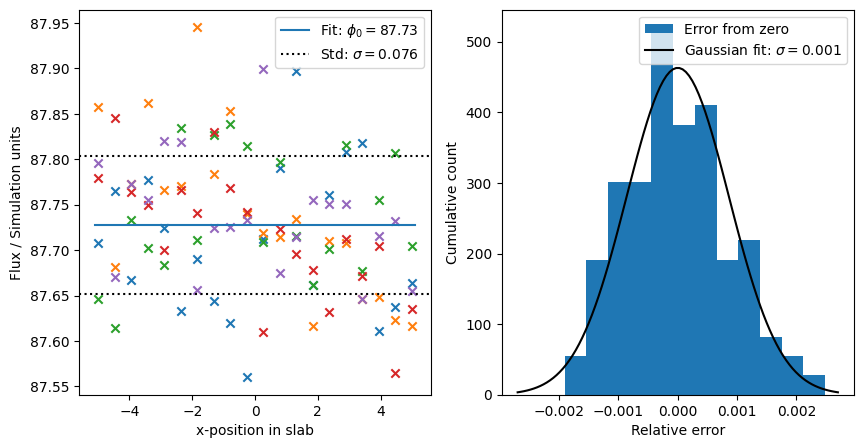

In [292]:
from scipy.optimize import curve_fit

def linear_fn(x, a):
    return a

all_fluxes = []
flux_arrays = []
cos_constants = []
for i in ['a', 'b', 'c', 'd', 'e']:
    data = get_data(f"/home/tom/Programming/SCONE/flux_measurements_inf/{i}.json")
    array = np.array(data["active"]["fluxMap"]["Res"])[:, :, :, 0, 0] / 2.73
    array = np.mean(array, axis=0)
    array = np.mean(array, axis=1)

    popt, pcov = curve_fit(linear_fn, np.linspace(-5, 5, len(array)), array)
    cos_constants.append(popt)

    flux_arrays.append(array)
    all_fluxes.extend(array)


# Fit cos_fn to flux_res
average_constants = np.mean(np.abs(cos_constants), axis=0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for flux in flux_arrays:
    ax1.scatter(np.linspace(-5, 5, len(flux)), flux, marker='x')


ax1.plot(np.linspace(-5.1, 5.1, 1000), average_constants[0]*np.linspace(1, 1, 1000), label=f"Fit: $\\phi_0 = {average_constants[0]:.2f}$")
ax1.axhline(np.mean(all_fluxes)+np.std(all_fluxes), color='black', linestyle=':', label=f"Std: $\\sigma = {np.std(all_fluxes):.3f}$")
ax1.axhline(np.mean(all_fluxes)-np.std(all_fluxes), color='black', linestyle=':')

ax1.set_ylabel(r"Flux / Simulation units")
ax1.set_xlabel("x-position in slab")
ax1.legend()

# Plot an error histogram
all_errors = []
for flux in flux_arrays:
    error = flux - average_constants[0]
    #ax2.scatter(np.linspace(-5, 5, len(flux)), error/ flux, marker='x')
    all_errors.extend(error/ average_constants[0])


ax2.hist(all_errors, bins=12, density=True, label="Error from zero")
# Fit a gaussian to the error
from scipy.stats import norm
mu, std = norm.fit(all_errors)
x = np.linspace(-0.0027, 0.0027, 100)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'k', label=f"Gaussian fit: $\\sigma={std:.3f}$")

# ax2.axhline(np.mean(all_errors), color='black', linestyle='--')
# ax2.axhline(np.mean(all_errors)+np.std(all_errors), color='black', linestyle=':', label=f"Std error: $\\pm{np.std(all_errors):.3f}$")
# ax2.axhline(np.mean(all_errors)-np.std(all_errors), color='black', linestyle=':')
ax2.set_ylabel("Cumulative count")
ax2.set_xlabel("Relative error")
ax2.legend()

In [21]:
current_std = np.sqrt(current_res[0, 0, 1, 1, :, 1])
current_res = current_res[0, 0, 1, 1, :, 0]

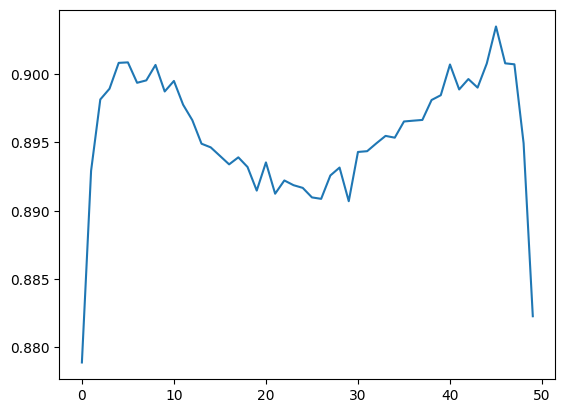

In [11]:
plt.plot(transport_res[0, 0, :, 0, 0])

In [295]:
data = get_data("/home/tom/Programming/SCONE/output_high_velocity.json")

current = np.array(data["active"]["currentMap"]["JM"])
transport = np.array(data["active"]["TransportXS"]["transportXS"])
flux = np.array(data["active"]["fluxMap"]["Res"])

flux_res = np.mean(np.mean(flux[:, :, :, 0, 0], axis=0), axis=1)
transport_res = np.mean(np.mean(transport[:, :, :, 0, 0], axis=0), axis=1)
current_res = current[0, 0, 1, 1, :, 0]
current_std = current[0, 0, 1, 1, :, 1]

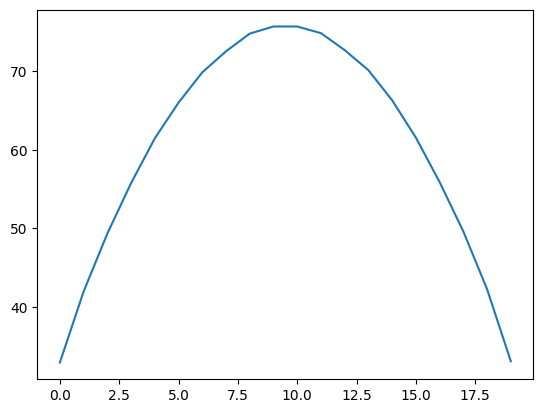

In [265]:
plt.plot(flux_res)

3.5211419375


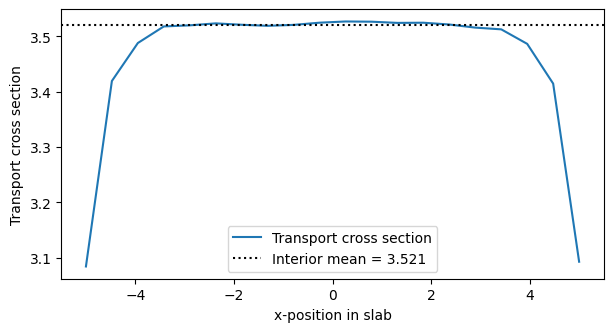

In [277]:
fig = plt.figure(figsize=(7, 3.5))
plt.plot(np.linspace(-5, 5, len(transport_res)), transport_res, label="Transport cross section")
plt.axhline(np.mean(transport_res[3:-3]), color='black', linestyle=':', label="Interior mean = {:.3f}".format(np.mean(transport_res[3:-3])))
print(np.mean(transport_res[3:-3]))
plt.xlabel("x-position in slab")
plt.ylabel("Transport cross section")
plt.legend()

[0.001]


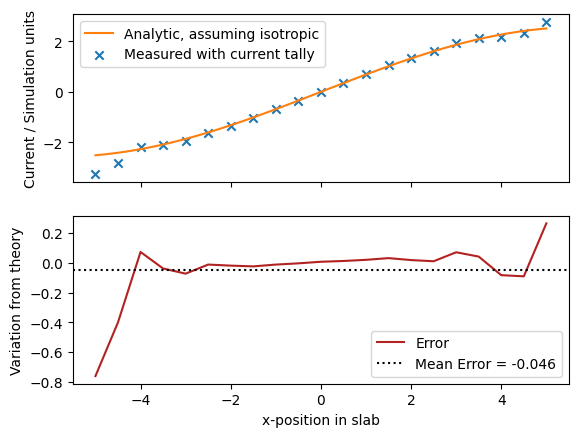

In [298]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

def plot_with_label(data, *args, **kargs):
    ax1.plot(np.linspace(-5, 5, len(data)), data, *args, **kargs)

def analytic_current(x, tr):
    return 2.57 * np.sin(0.27 * x)

plot_with_label(analytic_current(np.linspace(-5, 5, 10000), 3.521), label="Analytic, assuming isotropic", color="C1")




def current_fn(x, a):
    return (current_res)/np.abs(np.max(current_res)) * a

param, _ = curve_fit(current_fn, np.linspace(-5, 5, len(current_res)), analytic_current(np.linspace(-5, 5, len(current_res)), 3.521))
param = [0.001*np.abs(np.max(current_res))]

print(param/np.abs(np.max(current_res)))
ax1.scatter(np.linspace(-5, 5, len(current_res)), current_fn(np.linspace(-5, 5, len(current_res)), param[0]), marker="x", label="Measured with current tally", color="C0")

ax1.set_ylabel("Current / Simulation units")

ax1.legend()

ax2.plot(np.linspace(-5, 5, len(current_res)), current_fn(np.linspace(-5, 5, len(current_res)), param[0]) - analytic_current(np.linspace(-5, 5, len(current_res)), 3.521), color="firebrick", label="Error")
ax2.axhline(np.mean(current_fn(np.linspace(-5, 5, len(current_res)), param[0]) - analytic_current(np.linspace(-5, 5, len(current_res)), 3.521)), color='black', linestyle=':', label="Mean Error = {:.3f}".format(np.mean(current_fn(np.linspace(-5, 5, len(current_res)), param[0]) - analytic_current(np.linspace(-5, 5, len(transport_res_2)), 3.521))))
ax2.set_xlabel("x-position in slab")
ax2.set_ylabel("Variation from theory")
ax2.legend()

In [299]:
data = get_data("/home/tom/Programming/SCONE/output.json")
current = np.array(data["active"]["currentMap"]["JM"])
flux = np.array(data["active"]["fluxMap"]["Res"])
transport = np.array(data["active"]["TransportXS"]["transportXS"])


flux_res = np.mean(np.mean(flux[:, :, :, 0, 0], axis=0), axis=1)
transport_res = np.mean(np.mean(transport[:, :, :, 0, 0], axis=0), axis=1)

current_res = current[0, 0, 1, 1, :, 0]
current_std = np.sqrt(current[0, 0, 1, 1, :, 1])

plt.axhline(np.mean(current_res), 0, 1, color="C2", label="Mean Current")
plt.axhline(np.mean(current_res) + 2* np.std(current_res), 0, 1, color="C1", label=r"Mean current $\pm 2 \sigma$")
plt.axhline(np.mean(current_res) - 2* np.std(current_res), 0, 1, color="C1")
plt.errorbar(np.linspace(-5, 5, len(current_res)), current_res, 2*current_std, fmt="x", label=r"Tallied currents $\pm 2 \sigma$")

plt.xlabel("x-position from center of repeating slab")
plt.ylabel("Current normalized by flux")
plt.legend()

print(np.mean(current_res))
print(np.std(current_res))

(array([1., 0., 1., 0., 1., 1., 0., 1., 0., 2., 2., 1., 2., 0., 1., 3., 1.,
        1., 2., 1.]),
 array([-9.16155733e-03, -8.58615848e-03, -8.01075964e-03, -7.43536079e-03,
        -6.85996194e-03, -6.28456310e-03, -5.70916425e-03, -5.13376540e-03,
        -4.55836656e-03, -3.98296771e-03, -3.40756886e-03, -2.83217002e-03,
        -2.25677117e-03, -1.68137232e-03, -1.10597348e-03, -5.30574630e-04,
         4.48242163e-05,  6.20223063e-04,  1.19562191e-03,  1.77102076e-03,
         2.34641960e-03]),
 <BarContainer object of 20 artists>)

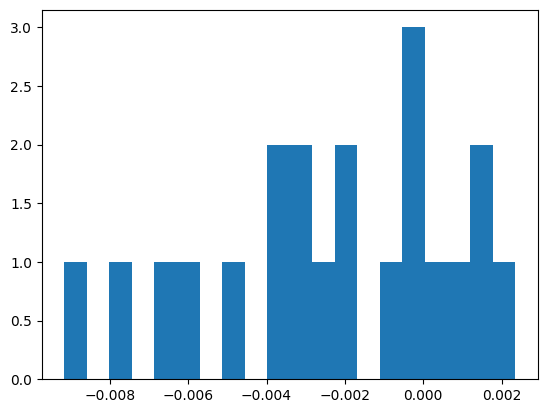

In [18]:
plt.hist(current_res, 20)
